In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500)
pd.set_option('max_colwidth', 800)

# GATHERING

In [10]:
twitter_arc = pd.read_csv('twitter-archive-enhanced.csv')
#twitter_arc.tail()

In [2]:
images_pred = pd.read_csv('image_predictions.tsv', sep="\t")
#images_pred.head()

In [3]:
import tweepy
from tweepy import OAuthHandler
import json

In [11]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_arc.tweet_id.values
len(tweet_ids)



2356

In [25]:

json_tweets = pd.read_json("tweet-json.txt", lines = True, encoding ='utf-8')
#json_tweets.head()


In [26]:
json_tweets = json_tweets[['id', 'retweet_count','favorite_count']]

In [6]:
#json_tweets.head()


# ASSESSING

### Tidiness 

- Delete Nan null rows and drop unnecessary columns (retweeted_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, id, extended_url
- Create a column called dog_stage with the values in the columns (doggo, floofer, pupper, puppo)
- Join all the tables (twitter_arc, images_pred, json_tweets) to create one DataFrame, drop the duplicate columns



### Quality

- Delete duplicate values
- Keep only the tweets with images. Remove retweets
- From the column source, extract the source which the tweet was made, in this case "Twitter for Iphone"
- Change the datatype of the column tweet_id, from int64 to object, the column img_num from float to int64, timestamp colomn to datetime
- Normalize the column name, p1, p2, p3 where the names all start with a capital letter
- Replace the underscore in the column p1, p2, p3 for space
- Replace the invalid names in the column name for 'None'
- Change the names for the columns(img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) for more descriptive names


## Visual Assessment

In [27]:
#Here, I assessed the data visually finding some quality and tidiness issues such as separet columns,
#drop columns, melt columns, extract information from some columns.
twitter_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [28]:
images_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [29]:
json_tweets

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Programmatic Assessment

In [30]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [31]:
images_pred.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [33]:
twitter_arc.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [34]:
twitter_arc.doggo.value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [35]:
twitter_arc.floofer.value_counts()


None       2346
floofer      10
Name: floofer, dtype: int64

In [36]:
twitter_arc.pupper.value_counts()


None      2099
pupper     257
Name: pupper, dtype: int64

In [37]:
twitter_arc.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [38]:
images_pred.p1.value_counts()


golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [39]:
images_pred.p2.value_counts()


Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [40]:
images_pred.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [11]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [41]:
json_tweets.id.duplicated().value_counts()

False    2354
Name: id, dtype: int64

In [42]:
twitter_arc.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

# CLEANING

### Define
- Join all the tables (twitter_arc, images_pred, json_tweets) to create one DataFrame using the merge command. Join on tweet_id. Save the data frame.

### Code

In [44]:
twitter_clean = twitter_arc.copy()
images_clean = images_pred.copy()
json_clean = json_tweets.copy()


In [45]:
df_clean_data = twitter_clean.merge(images_clean, on=['tweet_id'], how='left')
df_clean_data = df_clean_data.merge(json_clean,how='left', left_on=['tweet_id'],right_on=['id']) 

In [47]:
df_clean_data.to_csv('twitter_df',index=False)

### Test

In [48]:
df_clean_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,8.921774e+17,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,8.918152e+17,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8.916896e+17,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8.913276e+17,9774.0,41048.0


### Define
- Delete Nan nulls rows and drop unnecessary columns (retweeted_id, retweeted_status_user_id, retweeted_status_timestamp,
  in_reply_to_status_id, in_reply_to_user_id, id, extended_url) using the drop method.

### Code

In [49]:
twitter_clean_data = df_clean_data.copy()

In [51]:
# create a loop to iterate each row in the column 'retweeted_status_id' and remove row if not NaN. 
#Do the same with the column 'in_reply_to_status_id

for t, value in twitter_clean_data.iterrows():
    if not pd.isnull(value['retweeted_status_id']):
        twitter_clean_data.drop(t, inplace=True)


In [52]:
for t, value in twitter_clean_data.iterrows():
    if not pd.isnull(value['in_reply_to_status_id']):
        twitter_clean_data.drop(t, inplace=True)

In [53]:
twitter_clean_data = twitter_clean_data.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','id'],axis=1)

### Test

In [55]:
twitter_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   rating_numerator    2097 non-null   int64  
 5   rating_denominator  2097 non-null   int64  
 6   name                2097 non-null   object 
 7   doggo               2097 non-null   object 
 8   floofer             2097 non-null   object 
 9   pupper              2097 non-null   object 
 10  puppo               2097 non-null   object 
 11  jpg_url             1971 non-null   object 
 12  img_num             1971 non-null   float64
 13  p1                  1971 non-null   object 
 14  p1_conf             1971 non-null   float64
 15  p1_dog              1971 non-null   object 
 16  p2    

### Define
- Create a column called dog_stage using the values in the columns (doggo, floofer, pupper, puppo). Use the metl function. After done, drop the columns (doggo, floofer, pupper, puppo).

### Code

In [59]:
twitter_clean_data['dog_stage'] = twitter_clean_data[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
twitter_clean_data['dog_stage'] = twitter_clean_data['dog_stage'].str.replace(r'(None,)', repl='')
twitter_clean_data.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

C:\Users\Sindi\AppData\Local\Temp\ipykernel_22476\185928538.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_clean_data['dog_stage'] = twitter_clean_data['dog_stage'].str.replace(r'(None,)', repl='')


### Test

In [60]:
twitter_clean_data['dog_stage'].value_counts()

None             1761
pupper,None       221
doggo              72
puppo,None         23
floofer,None        9
pupper,doggo        9
puppo,doggo         1
floofer,doggo       1
Name: dog_stage, dtype: int64

In [61]:
twitter_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   rating_numerator    2097 non-null   int64  
 5   rating_denominator  2097 non-null   int64  
 6   name                2097 non-null   object 
 7   jpg_url             1971 non-null   object 
 8   img_num             1971 non-null   float64
 9   p1                  1971 non-null   object 
 10  p1_conf             1971 non-null   float64
 11  p1_dog              1971 non-null   object 
 12  p2                  1971 non-null   object 
 13  p2_conf             1971 non-null   float64
 14  p2_dog              1971 non-null   object 
 15  p3                  1971 non-null   object 
 16  p3_con

### Define
- Change the data type for the column 'timestamp' from object to datetime.

### Code

In [63]:
twitter_clean_data['timestamp'] = pd.to_datetime(twitter_clean_data['timestamp'])
twitter_clean_data['year'] = twitter_clean_data['timestamp'].dt.year


### Test

In [64]:
print(list(twitter_clean_data))
twitter_clean_data.head()

['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count', 'dog_stage', 'year']


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,year
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,None,2017
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,None,2017
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,None,2017
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,None,2017
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,None,2017


### Define
- Delete duplicate tweet_id. Use the method drop_duplicates()

### Code

In [65]:
twitter_clean_data= twitter_clean_data.drop_duplicates(subset='tweet_id')

### Test

In [66]:
twitter_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   jpg_url             1971 non-null   object             
 8   img_num             1971 non-null   float64            
 9   p1                  1971 non-null   object             
 10  p1_conf             1971 non-null   float64            
 11  p1_dog              1971 non-null   object             
 12  p2                  1971 non-null 

### Define
- Keep only the tweets with images filtering the column jpg_url.

### Code

In [68]:
twitter_clean_data = twitter_clean_data.loc[twitter_clean_data["jpg_url"].notnull()]



### Test

In [70]:
twitter_clean_data.info()
print(twitter_clean_data.isnull())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   jpg_url             1971 non-null   object             
 8   img_num             1971 non-null   float64            
 9   p1                  1971 non-null   object             
 10  p1_conf             1971 non-null   float64            
 11  p1_dog              1971 non-null   object             
 12  p2                  1971 non-null 

### Define
- Replace the invalid names in the column name for 'None'. Use a loop to iterate each row that has lowercase letter that means are invalid names.

### Code

In [71]:
for names in twitter_clean_data['name']:
    if names[0].islower():
       twitter_clean_data['name'].replace(names, 'None', inplace=True)  

### Test

In [73]:
twitter_clean_data['name'].tail(10)

2346    None
2347    None
2348    None
2349    None
2350    None
2351    None
2352    None
2353    None
2354    None
2355    None
Name: name, dtype: object

### Define
- Replace the underscore in the column p1. Use the method str.replace to change the underscore for space the same process to column p2, p3.

### Code

In [74]:
#twitter_data_df[["p1", "p2", "p3"]] = twitter_data_df[["p1", "p2", "p3"]].apply(lambda x: x.replace("_", " "))
twitter_clean_data['p1'] = twitter_clean_data['p1'].str.replace('_', ' ')
twitter_clean_data['p2'] = twitter_clean_data['p2'].str.replace('_', ' ')
twitter_clean_data['p3'] = twitter_clean_data['p3'].str.replace('_', ' ')

### Test

In [75]:
print(twitter_clean_data["p3"].value_counts())
print(twitter_clean_data["p2"].value_counts())
print(twitter_clean_data["p1"].value_counts())

Labrador retriever     76
Chihuahua              57
golden retriever       45
Eskimo dog             36
kelpie                 33
                       ..
bannister               1
rotisserie              1
hand blower             1
American black bear     1
partridge               1
Name: p3, Length: 403, dtype: int64
Labrador retriever          95
golden retriever            82
Cardigan                    72
Chihuahua                   43
Chesapeake Bay retriever    40
                            ..
screw                        1
coffee mug                   1
sombrero                     1
handkerchief                 1
mud turtle                   1
Name: p2, Length: 397, dtype: int64
golden retriever      137
Labrador retriever     94
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
nail                    1
timber wolf             1
espresso                1
bib                     1
desktop computer        1
Name: p1, Lengt

### Define
- Normalize the column name, p1, p2, p3 to first letter capitalized. Use the apply and title method.

### Code

In [76]:
twitter_clean_data[["name", "p1", "p2","p3"]] = twitter_clean_data[["name", "p1", "p2","p3"]].apply(lambda x: x.str.title())

### Test

In [78]:
print(twitter_clean_data["p1"].head())
print(twitter_clean_data["p2"].head())
print(twitter_clean_data["p3"].head())
print(twitter_clean_data["name"].head())

0         Orange
1      Chihuahua
2      Chihuahua
3    Paper Towel
4         Basset
Name: p1, dtype: object
0                 Bagel
1              Pekinese
2              Malamute
3    Labrador Retriever
4      English Springer
Name: p2, dtype: object
0                         Banana
1                       Papillon
2                         Kelpie
3                        Spatula
4    German Short-Haired Pointer
Name: p3, dtype: object
0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object


### Define
- Change the datatype of the columns tweet_id from int64 to object, the column img_num from float to int64

### Code

In [79]:
twitter_clean_data["tweet_id"] = twitter_clean_data["tweet_id"].astype('object')
twitter_clean_data["img_num"] = twitter_clean_data["img_num"].astype('int64')

### Test

In [80]:
twitter_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   jpg_url             1971 non-null   object             
 8   img_num             1971 non-null   int64              
 9   p1                  1971 non-null   object             
 10  p1_conf             1971 non-null   float64            
 11  p1_dog              1971 non-null   object             
 12  p2                  1971 non-null 

### Define
- From the column source, extract the source which the tweet was made, in this case "Twitter for Iphone". Import the library re and use regular expressions.

### Code

In [81]:
import re

In [82]:

twitter_clean_data['source'] = twitter_clean_data['source'].apply(lambda x: re.search(r'>(.*?)<', x).group(1))

### Test

In [83]:
print(twitter_clean_data['source'].value_counts())

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64


### Define
- Change the names for the columns(img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) for more descriptive names
   (image_count, dog_breed_1, dog_breed_1_confidence, is_a_dog_1, dog_breed_2, dog_breed_2_confidence, is_a_dog_2, dog_breed_3, dog_breed_3_confidence, is_a_dog_3)

### Code

In [86]:
twitter_clean_data.rename(columns={'img_num':'count', 
                                    'p1':'dog_breed_1', 
                                    'p1_conf':'dog_breed_1_confidence', 
                                    'p1_dog':'is_a_dog_1', 
                                    'p2':'dog_breed_2', 
                                    'p2_conf':'dog_breed_2_confidence', 
                                    'p2_dog':'is_a_dog_2', 
                                    'p3':'dog_breed_3', 
                                    'p3_conf':'dog_breed_3_confidence', 
                                    'p3_dog':'is_a_dog_3'}, inplace=True)

In [88]:
twitter_clean_data.rename(columns={'count':'image_count'}, inplace=True)

### Test

In [89]:
twitter_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1971 non-null   object             
 1   timestamp               1971 non-null   datetime64[ns, UTC]
 2   source                  1971 non-null   object             
 3   text                    1971 non-null   object             
 4   rating_numerator        1971 non-null   int64              
 5   rating_denominator      1971 non-null   int64              
 6   name                    1971 non-null   object             
 7   jpg_url                 1971 non-null   object             
 8   image_count             1971 non-null   int64              
 9   dog_breed_1             1971 non-null   object             
 10  dog_breed_1_confidence  1971 non-null   float64            
 11  is_a_dog_1              1971 non-null   obj

For better readability and ease of analysis, I rearranged the columns in a more logical order.

In [90]:
twitter_clean_data= twitter_clean_data.reindex(columns=['tweet_id', 'text', 'name','jpg_url','image_count','dog_stage',
                                'rating_numerator','rating_denominator','dog_breed_1','dog_breed_1_confidence','is_a_dog_1',
                                'dog_breed_2','dog_breed_2_confidence','is_a_dog_2 ','dog_breed_3','dog_breed_3_confidence','is_a_dog_3',
                                'retweet_count',
                                'favorite_count','timestamp','year','source'])

In [91]:
twitter_clean_data.head()

,tweet_id,text,name,jpg_url,image_count,dog_stage,rating_numerator,rating_denominator,dog_breed_1,dog_breed_1_confidence,is_a_dog_1,dog_breed_2,dog_breed_2_confidence,is_a_dog_2,dog_breed_3,dog_breed_3_confidence,is_a_dog_3,retweet_count,favorite_count,timestamp,year,source
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,13,10,Orange,0.097049,False,Bagel,0.085851,NaN,Banana,0.076110,False,8853.0,39467.0,2017-08-01 16:23:56+00:00,2017,Twitter for iPhone
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,None,13,10,Chihuahua,0.323581,True,Pekinese,0.090647,NaN,Papillon,0.068957,True,6514.0,33819.0,2017-08-01 00:17:27+00:00,2017,Twitter for iPhone
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,None,12,10,Chihuahua,0.716012,True,Malamute,0.078253,NaN,Kelpie,0.031379,True,4328.0,25461.0,2017-07-31 00:18:03+00:00,2017,Twitter for iPhone
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,None,13,10,Paper Towel,0.170278,False,Labrador Retriever,0.168086,NaN,Spatula,0.040836,False,8964.0,42908.0,2017-07-30 15:58:51+00:00,2017,Twitter for iPhone
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,None,12,10,Basset,0.555712,True,English Springer,0.225770,NaN,German Short-Haired Pointer,0.175219,True,9774.0,41048.0,2017-07-29 16:00:24+00:00,2017,Twitter for iPhone


## STORING 

- Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv"

In [92]:
twitter_clean_data.to_csv('twitter_archive_master.csv', index=False)
pd.read_csv('twitter_archive_master.csv')

,tweet_id,text,name,jpg_url,image_count,dog_stage,rating_numerator,rating_denominator,dog_breed_1,dog_breed_1_confidence,is_a_dog_1,dog_breed_2,dog_breed_2_confidence,is_a_dog_2,dog_breed_3,dog_breed_3_confidence,is_a_dog_3,retweet_count,favorite_count,timestamp,year,source
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,13,10,Orange,0.097049,False,Bagel,0.085851,NaN,Banana,0.076110,False,8853.0,39467.0,2017-08-01 16:23:56+00:00,2017,Twitter for iPhone
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,None,13,10,Chihuahua,0.323581,True,Pekinese,0.090647,NaN,Papillon,0.068957,True,6514.0,33819.0,2017-08-01 00:17:27+00:00,2017,Twitter for iPhone
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,None,12,10,Chihuahua,0.716012,True,Malamute,0.078253,NaN,Kelpie,0.031379,True,4328.0,25461.0,2017-07-31 00:18:03+00:00,2017,Twitter for iPhone
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,None,13,10,Paper Towel,0.170278,False,Labrador Retriever,0.168086,NaN,Spatula,0.040836,False,8964.0,42908.0,2017-07-30 15:58:51+00:00,2017,Twitter for iPhone
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,None,12,10,Basset,0.555712,True,English Springer,0.225770,NaN,German Short-Haired Pointer,0.175219,True,9774.0,41048.0,2017-07-29 16:00:24+00:00,2017,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,None,5,10,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,NaN,Doberman,0.154629,True,41.0,111.0,2015-11-16 00:24:50+00:00,2015,Twitter for iPhone
1967,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,None,6,10,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,NaN,Miniature Pinscher,0.222752,True,147.0,311.0,2015-11-16 00:04:52+00:00,2015,Twitter for iPhone
1968,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,None,9,10,German Shepherd,0.596461,True,Malinois,0.138584,NaN,Bloodhound,0.116197,True,47.0,128.0,2015-11-15 23:21:54+00:00,2015,Twitter for iPhone
1969,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,None,7,10,Redbone,0.506826,True,Miniature Pinscher,0.074192,NaN,Rhodesian Ridgeback,0.072010,True,48.0,132.0,2015-11-15 23:05:30+00:00,2015,Twitter for iPhone


## ANALYZING

#### Insight 1

- The dog's popularity has increased in the last couple years. In 2016, 1,632,442 people has an interaction with a dog related tweet. This amount increase to 7,480,034 in 2016, and 8,526,213 in 2017.

In [93]:
dogs_popularity = twitter_clean_data.groupby('year')['favorite_count'].sum()
dogs_popularity

year
2015    1632442.0
2016    7480034.0
2017    8526213.0
Name: favorite_count, dtype: float64

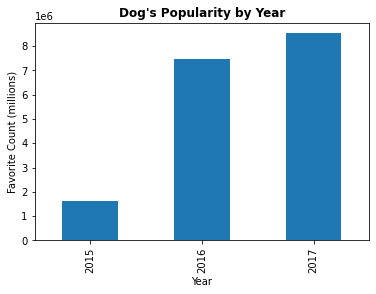

In [94]:
dogs_popularity.plot(kind = 'bar')

plt.title("Dog's Popularity by Year", fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Favorite Count (millions)")
plt.savefig('output.png', dpi=300)
plt.show()


### Insight 2

- The top 5 popular name in this dataset are 11 Dogs named Charlie, and a tidy rank for Lucy, Cooper, Oliver with 10 dogs each. In this dataset, we have an outlier for tweets without a dog name. This represent about 31.56% of the tweets.

In [95]:
top_5_name = twitter_clean_data['name'].value_counts() 
top_5_name = top_5_name.head()
top_5_name

None       622
Charlie     11
Lucy        10
Cooper      10
Oliver      10
Name: name, dtype: int64

In [96]:
proportion = top_5_name /  twitter_clean_data['name'].count() * 100
rounded_proportion = round(proportion, 2)
top_5_rounded_proportion = rounded_proportion.head()
top_5_rounded_proportion 

None       31.56
Charlie     0.56
Lucy        0.51
Cooper      0.51
Oliver      0.51
Name: name, dtype: float64

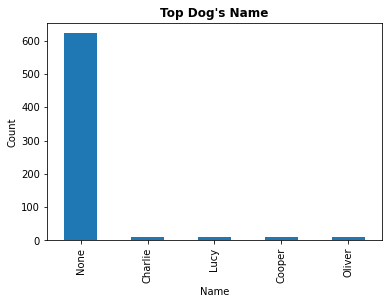

In [102]:
top_5_name.plot(kind = 'bar')

plt.title("Top Dog's Name", fontweight = 'bold')
plt.xlabel("Name")
plt.ylabel("Count")

plt.savefig('dogsname.png', dpi=300)
plt.show()


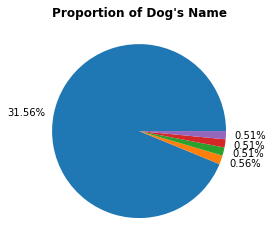

In [103]:
labels = ['31.56%', '0.56%', '0.51%', '0.51%', '0.51%']
plt.pie(top_5_rounded_proportion, labels = labels)
plt.title("Proportion of Dog's Name", fontweight = 'bold')
plt.savefig('proportion1.png', dpi=300)
plt.show()

### Insight 3

- The most common breed in this dataset is Golden Retriever with 137 dogs, follow for Labrador Retriever with 94.

In [98]:
dog_stage_popularity = twitter_clean_data['dog_breed_1'].value_counts()

In [99]:
Most_common_breed = dog_stage_popularity.head()
Most_common_breed

Golden Retriever      137
Labrador Retriever     94
Pembroke               88
Chihuahua              78
Pug                    54
Name: dog_breed_1, dtype: int64